Problem:

A bank wants to check the eligibility for home loan based on different customer details.This is a classification problem.
We have to predict if the loan will be approved or not.

In [1]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
pd.options.display.max_columns = 999

## imporing the dataset

In [3]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\Loan Prediction Dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# dropping the loan id column

df= df.drop(['Loan_ID'],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# for statistical analysis

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## preprocessing

In [7]:
# finding the null values

df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# filling numericalvalues with median

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df["Loan_Amount_Term"] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())


In [9]:
# filling the categorical values with mode

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

                                   

In [10]:
# checking null values again

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Performing Exploratory Data Analysis

In [11]:
# for eda we will use countplot for categorical features

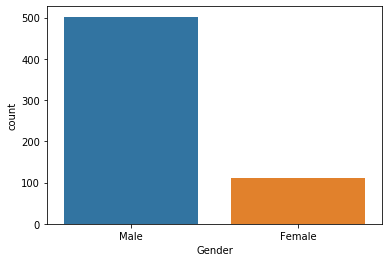

In [12]:
sns.countplot(df['Gender'])

We can see That most of our loan applicants are males

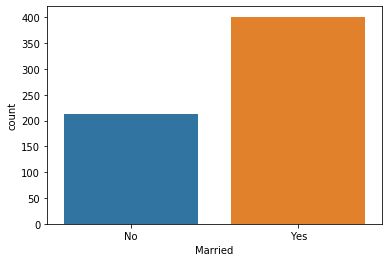

In [13]:
sns.countplot(df['Married'])

we have almost twice as many married applicants than unmarried ones

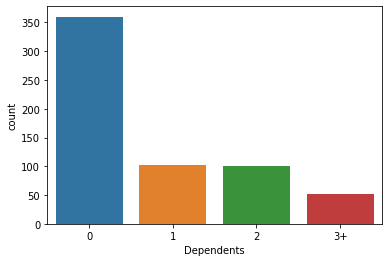

In [14]:
sns.countplot(df['Dependents'])

Most of our loan applicants have no dependents

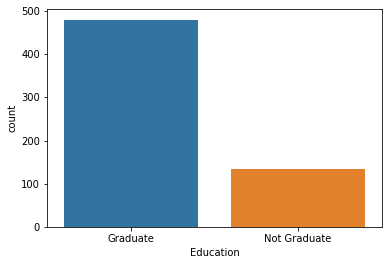

In [15]:
sns.countplot(df['Education'])

Most loan applicants are graduates

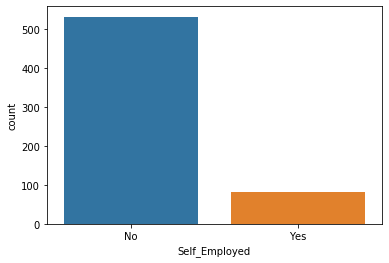

In [16]:
sns.countplot(df['Self_Employed'])

Less self employed people apply for loan according to our data set

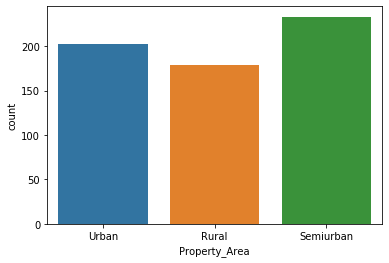

In [17]:
sns.countplot(df['Property_Area'])

Applicants are equally distributed according to this feature

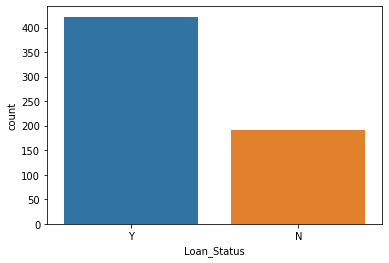

In [18]:
sns.countplot(df['Loan_Status'])

The number of loans approved in almost twice as much as number of loans disapproved

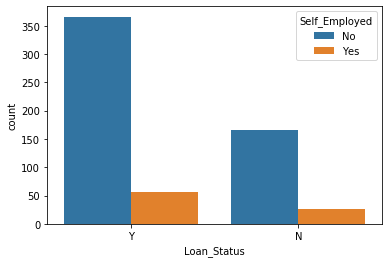

In [19]:
sns.countplot(df['Loan_Status'],hue = df['Self_Employed'])

In [20]:
# eda for numerical features

6.539513113994625


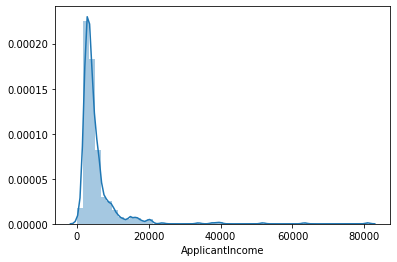

In [21]:
sns.distplot(df['ApplicantIncome'])
print (df['ApplicantIncome'].skew())

In [22]:
# sns.boxplot(df['ApplicantIncome'])

We can see that our graph is right skewed, we will take care of this through normalization or standardizing

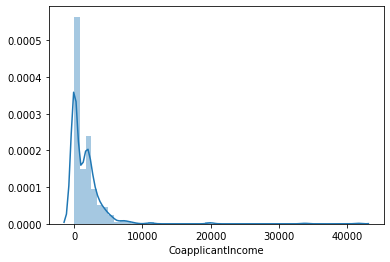

In [23]:
sns.distplot(df["CoapplicantIncome"])

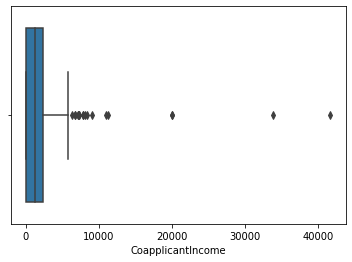

In [24]:
sns.boxplot(df['CoapplicantIncome'])

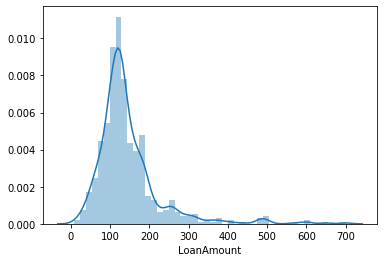

In [25]:
sns.distplot(df["LoanAmount"])

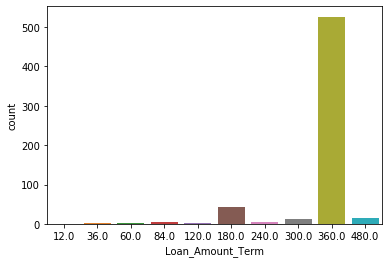

In [26]:
sns.countplot(df['Loan_Amount_Term'])

In [27]:
df.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Most of the people have a loan amount term of 30 years

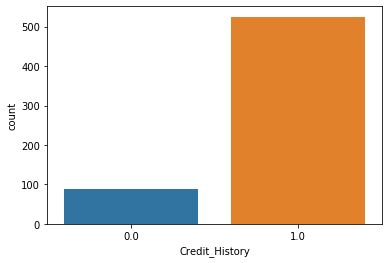

In [28]:
sns.countplot(df['Credit_History'])

most of the people have a good credit history

## creating a new feature

In [29]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


## Handling outliers

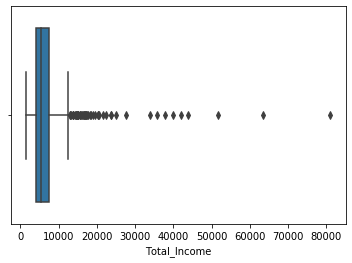

In [30]:
# handling outliers in total income

sns.boxplot(df['Total_Income'])

we can see that some people have really high income compared to our normal dataset.
outliers can either be removed (if present in very less numbers)
or capped

we will apply the capping technique

In [31]:
q1 = df['Total_Income'].quantile(0.25)
q3 = df['Total_Income'].quantile(0.75)
iqr = q3 - q1

In [32]:
upper_limit1 = q3 + 1.5*iqr
lower_limit1 = q1 - 1.5*iqr

In [33]:
# printing all the ouliers
df[(df["Total_Income"]>upper_limit1) | (df["Total_Income"]<lower_limit1)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0
34,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N,15500.0
102,Male,Yes,0,Graduate,No,13650,0.0,128.0,360.0,1.0,Urban,Y,13650.0
115,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y,14583.0
126,Male,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y,23803.0
128,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N,14363.0
130,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1.0,Urban,Y,20166.0
138,Male,No,0,Graduate,No,14999,0.0,242.0,360.0,0.0,Semiurban,N,14999.0
146,Female,Yes,2,Graduate,No,14866,0.0,70.0,360.0,1.0,Urban,Y,14866.0
155,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,39999.0


In [34]:
print(df.shape)
print(df[(df["Total_Income"]>upper_limit1) | (df["Total_Income"]<lower_limit1)].shape)

(614, 13)
(50, 13)


In [35]:
df["Total_Income"] = np.where(df["Total_Income"]>upper_limit1,upper_limit1,
            np.where(df["Total_Income"]<lower_limit1,lower_limit1,
                    df["Total_Income"]))

In [36]:
df[(df["Total_Income"]>upper_limit1) | (df["Total_Income"]<lower_limit1)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income


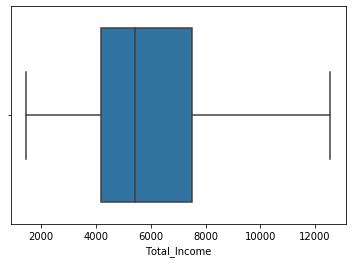

In [37]:
sns.boxplot(df['Total_Income'])

we have capped all the outliers in this column, no more remaining outliers

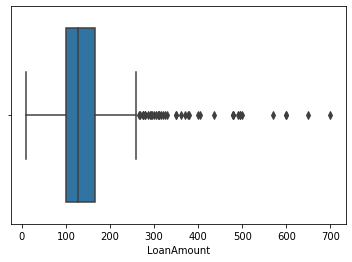

In [38]:
# handling outliers in loan amout column

sns.boxplot(df['LoanAmount'])

In [39]:
q1 = df['LoanAmount'].quantile(0.25)
q3 = df['LoanAmount'].quantile(0.75)
iqr = q3 - q1
upper_limit2 = q3 + 1.5*iqr
lower_limit2 = q1 - 1.5*iqr

In [40]:
# printing all the ouliers
df[(df["LoanAmount"]>upper_limit2) | (df["LoanAmount"]<lower_limit2)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.000
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,12555.375
21,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y,11580.000
34,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N,12555.375
54,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N,11500.000
67,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y,10750.000
83,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,1.0,Semiurban,N,8250.000
126,Male,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y,12555.375
130,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1.0,Urban,Y,12555.375
135,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N,11750.000


In [41]:
print(df.shape)
print(df[(df["LoanAmount"]>upper_limit2) | (df["LoanAmount"]<lower_limit2)].shape)

(614, 13)
(41, 13)


In [42]:
df["LoanAmount"] = np.where(df["LoanAmount"]>upper_limit2,upper_limit2,
            np.where(df["LoanAmount"]<lower_limit2,lower_limit2,
                    df["LoanAmount"]))

In [43]:

df[(df["LoanAmount"]>upper_limit2) | (df["LoanAmount"]<lower_limit2)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income


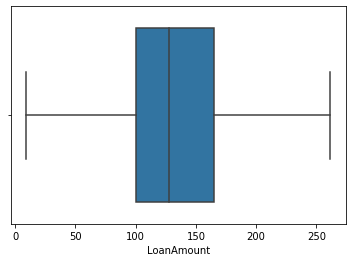

In [44]:
sns.boxplot(df['LoanAmount'])

all the outliers have been capped, no more outliers remaining

## applying standard scaler

In [45]:
features = df[["LoanAmount", "Loan_Amount_Term", "Total_Income"]]
features.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaled_features = sc.fit_transform(features)


In [46]:
scaled_features

array([[-0.16804076,  0.2732313 , -0.12031624],
       [-0.16804076,  0.2732313 , -0.03609689],
       [-1.28046152,  0.2732313 , -1.11180761],
       ...,
       [ 2.07474303,  0.2732313 ,  0.7368418 ],
       [ 0.89055319,  0.2732313 ,  0.48313972],
       [-0.07832941,  0.2732313 , -0.56090173]])

In [47]:
scaled_features_df = pd.DataFrame(scaled_features)

In [48]:
scaled_features_df.head()

,0,1,2
0,-0.168041,0.273231,-0.120316
1,-0.168041,0.273231,-0.036097
2,-1.280462,0.273231,-1.111808
3,-0.311579,0.273231,-0.436313
4,0.065209,0.273231,-0.067766


In [49]:
df = pd.concat((df, scaled_features_df), 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,0,1,2
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,-0.168041,0.273231,-0.120316
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,-0.168041,0.273231,-0.036097
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,-1.280462,0.273231,-1.111808
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,-0.311579,0.273231,-0.436313
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.065209,0.273231,-0.067766


## Corelation matrix

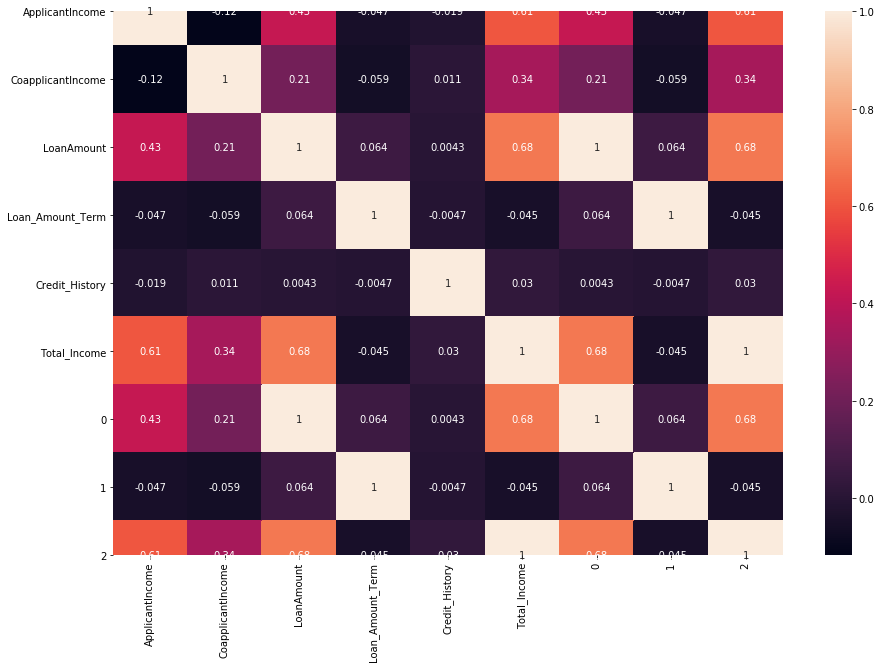

In [50]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)

## Feature Selection

Some of the features here are not important because of high correlation
deleting such features

In [51]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income"]
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,0,1,2
0,Male,No,0,Graduate,No,1.0,Urban,Y,-0.168041,0.273231,-0.120316
1,Male,Yes,1,Graduate,No,1.0,Rural,N,-0.168041,0.273231,-0.036097
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,-1.280462,0.273231,-1.111808
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,-0.311579,0.273231,-0.436313
4,Male,No,0,Graduate,No,1.0,Urban,Y,0.065209,0.273231,-0.067766


In [52]:
# renaming column 0,1 and 2
df.rename(columns = {0:'LoanAmount', 1:'Loan_Amount_Term',
                              2:'Total_Income'}, inplace = True)

In [53]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount,Loan_Amount_Term,Total_Income
0,Male,No,0,Graduate,No,1.0,Urban,Y,-0.168041,0.273231,-0.120316
1,Male,Yes,1,Graduate,No,1.0,Rural,N,-0.168041,0.273231,-0.036097
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,-1.280462,0.273231,-1.111808
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,-0.311579,0.273231,-0.436313
4,Male,No,0,Graduate,No,1.0,Urban,Y,0.065209,0.273231,-0.067766


## Encoding

In [54]:
df["Dependents"] = df["Dependents"].map({'3+':3, '2':2, '1':1, '0':0})

In [55]:
df["Education"] = df["Education"].map({'Not Graduate':0, 'Graduate':1})

In [56]:
df["Loan_Status"] = df["Loan_Status"].map({'N':0, 'Y':1})

In [57]:
df_oh = df

def ohe(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['Gender','Married','Self_Employed','Property_Area']

for col in cols:
    df_oh = ohe(df_oh, col)
df_oh.head()

,Dependents,Education,Credit_History,Loan_Status,LoanAmount,Loan_Amount_Term,Total_Income,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1.0,1,-0.168041,0.273231,-0.120316,1,0,0,0,1
1,1,1,1.0,0,-0.168041,0.273231,-0.036097,1,1,0,0,0
2,0,1,1.0,1,-1.280462,0.273231,-1.111808,1,1,1,0,1
3,0,0,1.0,1,-0.311579,0.273231,-0.436313,1,1,0,0,1
4,0,1,1.0,1,0.065209,0.273231,-0.067766,1,0,0,0,1


## Train Test Split

In [59]:
X = df_oh.drop(columns=['Loan_Status'],axis=1)
y = df_oh['Loan_Status']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Model Training

In [62]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 68.83116883116884


In [65]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 74.02597402597402


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Since Logistic Regression Gave us 77% accuracy we are going to Use Logistic Regression to build our Final Model

## Bulding our Final model

In [66]:
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[21, 33],
       [ 2, 98]], dtype=int64)

In [77]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test,y_pred)

0.7480916030534351

In [78]:
recall_score(y_test,y_pred)

0.98